<a href="https://colab.research.google.com/github/trjgdyan/trjgdyan/blob/main/aiclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! chmod 600 kaggle.json

In [5]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d harishvutukuri/dogs-vs-wolves

 97% 214M/222M [00:01<00:00, 167MB/s]
100% 222M/222M [00:01<00:00, 149MB/s]


In [6]:
import zipfile
zip_file = zipfile.ZipFile('/content/dogs-vs-wolves.zip')
zip_file.extractall('/tmp/')

In [7]:
import numpy as np
import pandas as pd 
import os


In [8]:
#the imports
import random
import matplotlib.pyplot as plt
import keras.backend as K
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Activation, AveragePooling2D
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
dogs = []
wolves = []
img_size = 300
DOGS_IMGS_PATH = '/tmp/data/dogs'
WOLVES_IMGS_PATH = '/tmp/data/wolves'
DIRS = [(0, DOGS_IMGS_PATH), (1, WOLVES_IMGS_PATH)]

In [10]:
train_images = []
labels = []
for num, _dir in DIRS:
    _dir = _dir + '/'
    count = 0
    for file in os.listdir(_dir):
        if count >= 1000:
            break
        img = image.load_img(_dir + str(file), target_size=(img_size, img_size))
        img = image.img_to_array(img)
        img = img/255
        train_images.append(img)
        labels.append(num)
        count += 1

In [11]:
train_images[1].shape

(300, 300, 3)

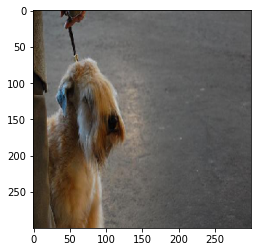

In [12]:
plt.imshow(train_images[1])

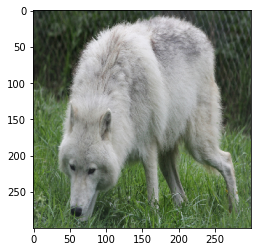

In [13]:
plt.imshow(train_images[1650])

In [14]:
len(train_images)

2000

In [15]:
X = np.array(train_images)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=101) #penyimpanan data

In [17]:
len(X_train)

1800

In [18]:
y_train_labels = to_categorical(y_train)

In [19]:
def build(width, height, depth, classes):
    #initialize the model along with the input shape
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (depth, height, width)
        chanDim = 1
        
    # CONV -> RELU -> MAXPOOL
    model.add(Convolution2D(64, (3,3), padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # (CONV -> RELU)*2 -> AVGPOOL
    model.add(Convolution2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Convolution2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(AveragePooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # CONV -> RELU -> MAXPOOL
    model.add(Convolution2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # CONV -> RELU -> AVGPOOL
    model.add(Convolution2D(512, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(AveragePooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # DENSE -> RELU
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # DENSE -> RELU
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # sigmoid -> just to check the accuracy with this (softmax would work too)
    model.add(Dense(classes))
    model.add(Activation('sigmoid'))
    
    return model

In [20]:
model = build(img_size, img_size, 3, 2)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 activation (Activation)     (None, 300, 300, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 300, 300, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     7

In [23]:
history = model.fit(X_train, y_train_labels, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
51/51 [==============================] - 870s 17s/step - loss: 0.9084 - accuracy: 0.6488 - val_loss: 2.9400 - val_accuracy: 0.4889
Epoch 2/20
51/51 [==============================] - 883s 17s/step - loss: 0.6743 - accuracy: 0.7037 - val_loss: 3.5716 - val_accuracy: 0.4944
Epoch 3/20
51/51 [==============================] - 869s 17s/step - loss: 0.5983 - accuracy: 0.7346 - val_loss: 1.4505 - val_accuracy: 0.4889
Epoch 4/20
51/51 [==============================] - 870s 17s/step - loss: 0.5663 - accuracy: 0.7407 - val_loss: 1.9371 - val_accuracy: 0.4944
Epoch 5/20
51/51 [==============================] - 884s 17s/step - loss: 0.5102 - accuracy: 0.7858 - val_loss: 0.8498 - val_accuracy: 0.5944
Epoch 6/20
51/51 [==============================] - 869s 17s/step - loss: 0.4544 - accuracy: 0.8012 - val_loss: 2.2850 - val_accuracy: 0.4944
Epoch 7/20
51/51 [==============================] - 866s 17s/step - loss: 0.4244 - accuracy: 0.8148 - val_loss: 0.5650 - val_accuracy: 0.7389
Epoch 

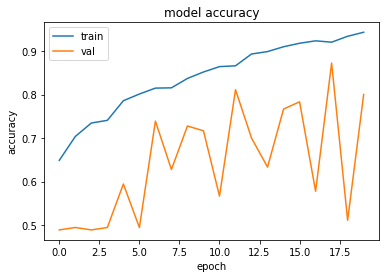

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

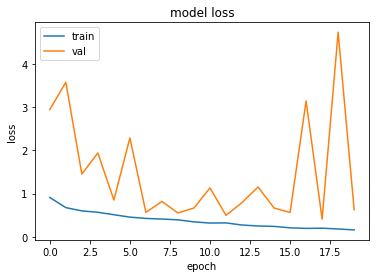

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
predictions = model.predict(X_test)

7/7 [==============================] - 25s 3s/step


In [36]:
print(classification_report(predictions, y_test)) #print akurasi cnn

ValueError: ignored

In [34]:
random_indices = [random.randint(0,180) for i in range(9)]

In [35]:
plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    pred = predictions[index]
    pred = 'dog' if pred==0 else 'Wolve'
    actual = 'dog' if y_test[index]==0 else 'Wolve'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()

ValueError: ignored

<Figure size 720x720 with 0 Axes>